## Distribution of Sales for different Categories

We want to check if sales distribution change across categories for different days of the week. Besides of this, the distribution by hour may change for each day. This could show us that the context is importante for the model

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_gbq

In [2]:
# Plot day of the week sales distribution for different categories

def plot_categories_by_day(categories):
    _, ax = plt.subplots(2, 2, sharey=False, figsize=(15, 15))

    for i, category in zip([[0, 0], [0, 1], [1, 0], [1, 1]], categories):

        df_2 = df.loc[df.category_name.isin([category]), :]

        df_gr = df_2.groupby(["category_name", "day_name"])[["times"]].sum().reset_index()

        sns.barplot(data=df_gr, x="day_name", y="times", ax=ax[i[0], i[1]], order=["Lunes", "Martes", "Miércoles", "Jueves", "Viernes", "Sábado", "Domingo"])
        ax[i[0], i[1]].set_title(category)
        ax[i[0], i[1]].set_xlabel("")
        ax[i[0], i[1]].set_ylabel("Productos Vendidos")

    plt.suptitle("Ventas por Día de la Semana")
    plt.show()
    
    return None

In [3]:
# Plot hourly sales distribution for different days for a category

def plot_category_by_day(category, days):

    _, ax = plt.subplots(2, 2, sharey=False, figsize=(15, 15))

    for i, day in zip([[0, 0], [0, 1], [1, 0], [1, 1]], days):

        df_2 = df.loc[(df.category_name == category) &
                      (df.day_name == day), :]

        df_gr = df_2.groupby(["category_name", "day_name", "HOUR"])[["times"]].sum().reset_index()

        sns.barplot(data=df_gr, x="HOUR", y="times", ax=ax[i[0], i[1]])
        ax[i[0], i[1]].set_title(day)
        ax[i[0], i[1]].set_xlabel("")
        ax[i[0], i[1]].set_ylabel("Productos Vendidos")

    plt.suptitle(f"Ventas por Día de la Semana y Hora para {category}")
    plt.show()
    
    return None

In [4]:
# Parameters
DAYS = {1: "Domingo", 2: "Lunes", 3: "Martes", 4: "Miércoles", 5: "Jueves", 6: "Viernes", 7: "Sábado"}

### Downloading the data

In [5]:
QUERY = """
SELECT
category_name
, EXTRACT(DAYOFWEEK FROM timestamp) as DAY
, EXTRACT(HOUR FROM timestamp) as HOUR
, COUNT(*) as times
FROM `peya-food-and-groceries.user_fiorella_dirosario.order_sep2020_sep2021` o
LEFT JOIN `peya-food-and-groceries.user_fiorella_dirosario.order_details_sep2020_sep2021` od ON od.order_id = o.order_id
LEFT JOIN `peya-food-and-groceries.user_fiorella_dirosario.product_attributes_sep2020_sep2021` p ON p.gtin=od.gtin
WHERE od.has_gtin=1
GROUP BY 1,2,3
ORDER BY 1,2,3
"""

df = pandas_gbq.read_gbq(QUERY, project_id="peya-growth-and-onboarding")
df.to_csv("category_day_hour.csv", index=False)


Downloading: 100%|██████████| 22790/22790 [00:01<00:00, 14508.03rows/s]


### Preprocessing

In [6]:
df = pd.read_csv("category_day_hour.csv")

df.loc[df.category_name.isin(['Cervezas Negras',
                              'Cervezas Rojas',
                              'Cervezas Rubias']), "category_name"] = "Cervezas"
                              
df["day_name"] = df.DAY.map(DAYS)


### Plotting Distributions

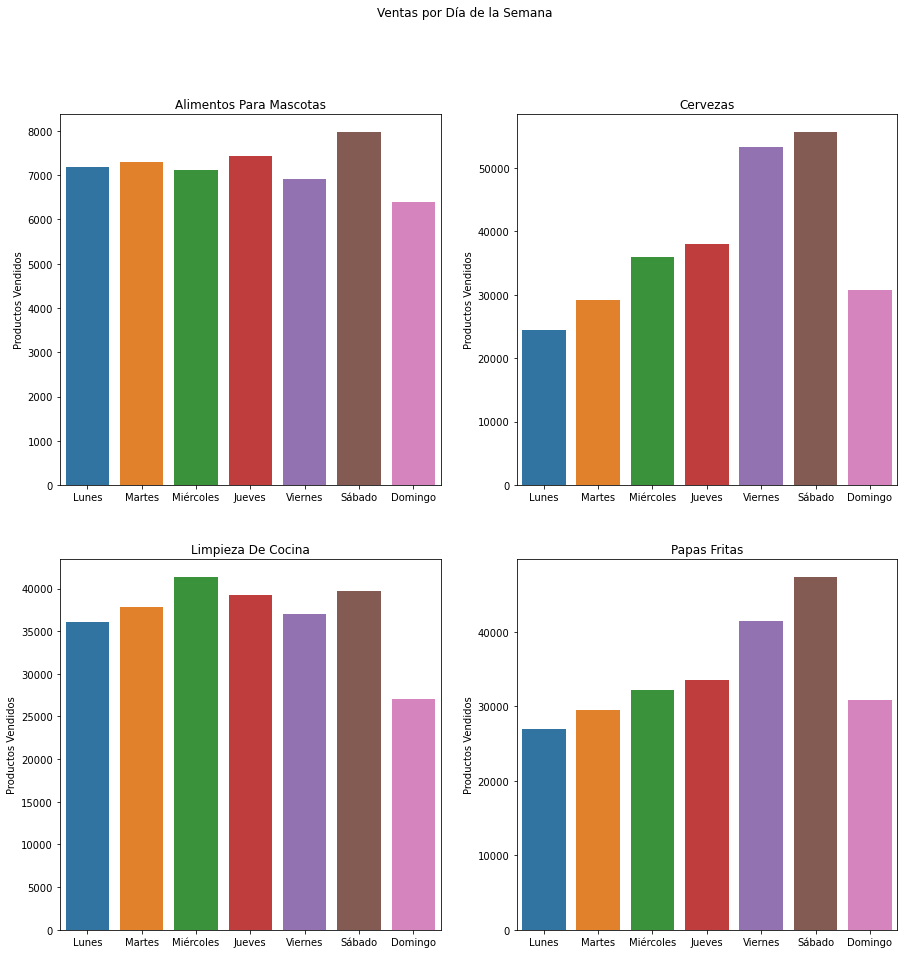

In [7]:
plot_categories_by_day(['Alimentos Para Mascotas', 'Cervezas', 'Limpieza De Cocina', 'Papas Fritas'])

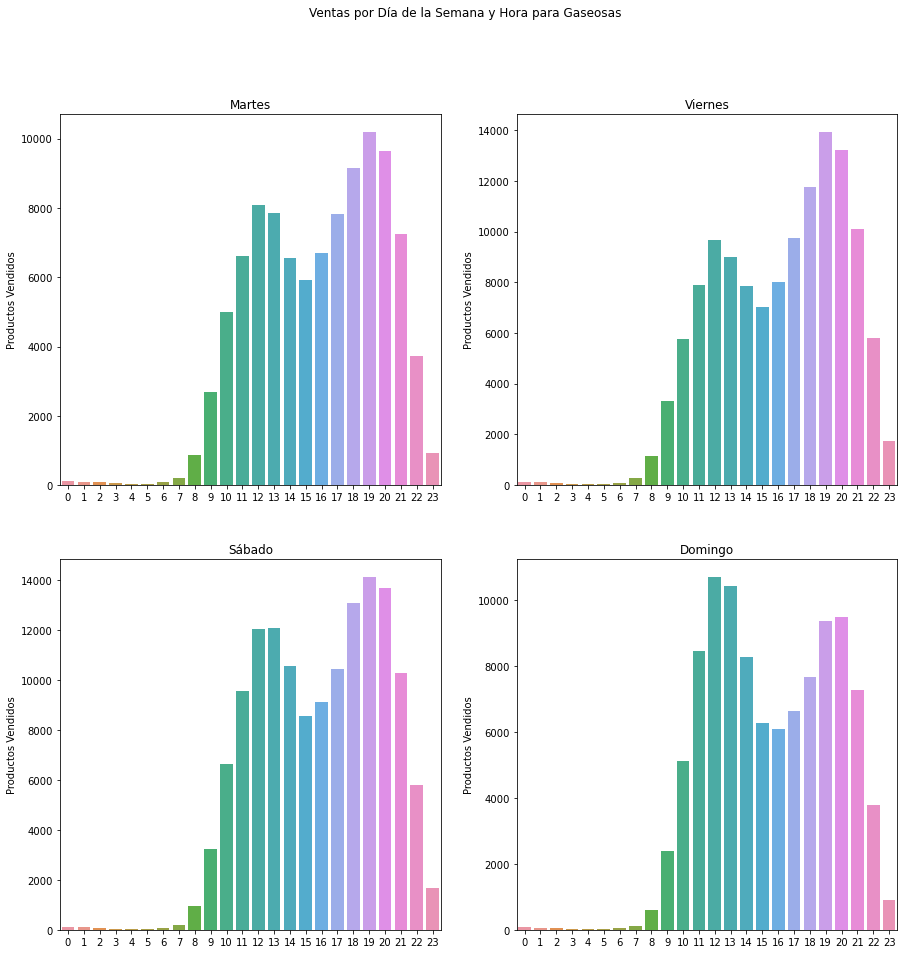

In [8]:
plot_category_by_day('Gaseosas', ["Martes", "Viernes", "Sábado", "Domingo"])

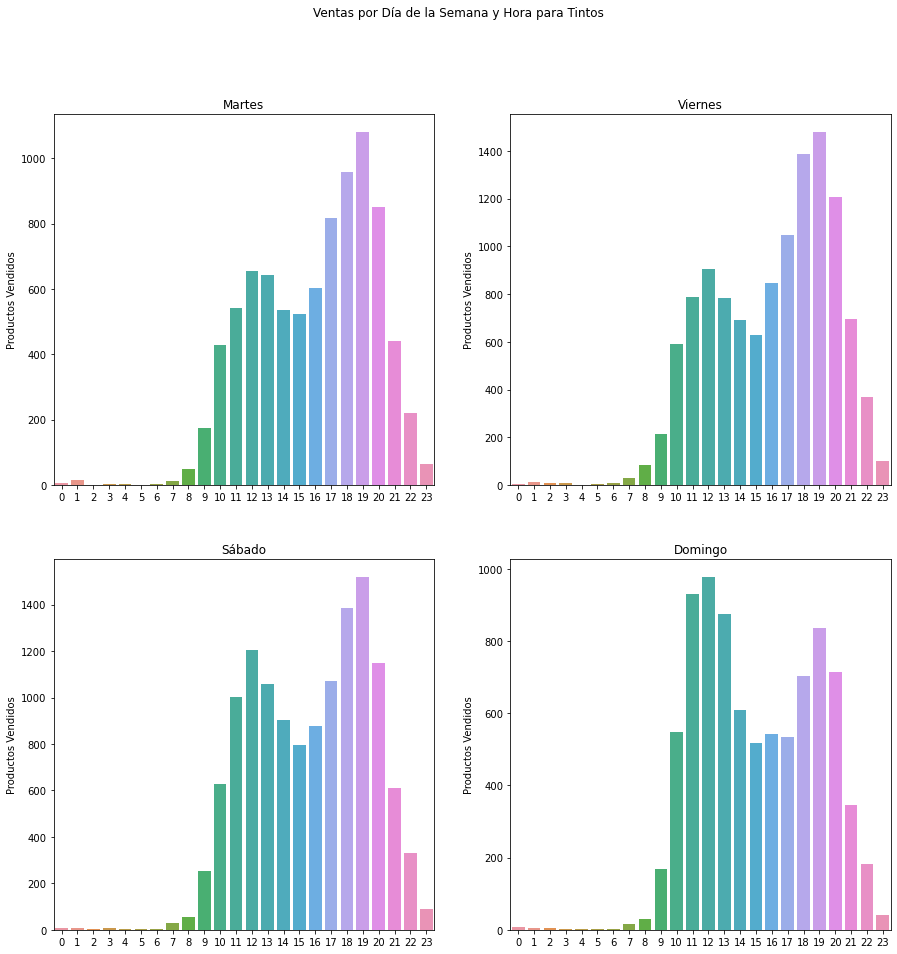

In [9]:
plot_category_by_day('Tintos', ["Martes", "Viernes", "Sábado", "Domingo"])

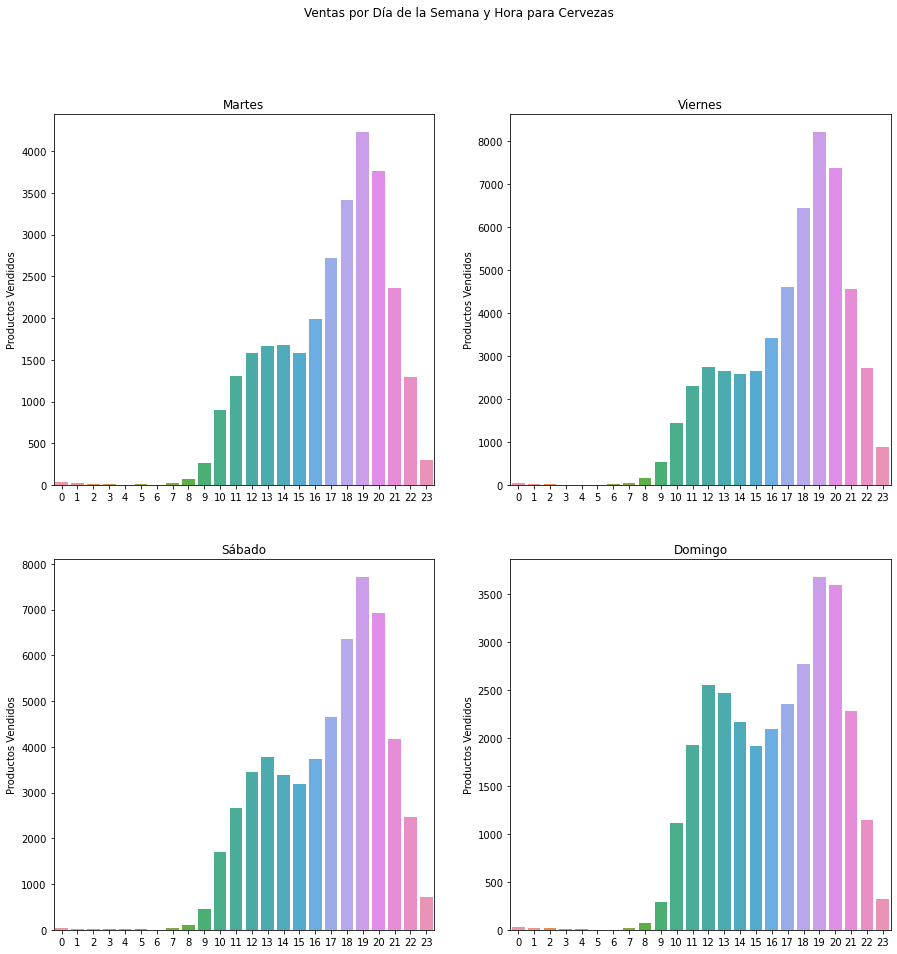

In [10]:
plot_category_by_day('Cervezas', ["Martes", "Viernes", "Sábado", "Domingo"])

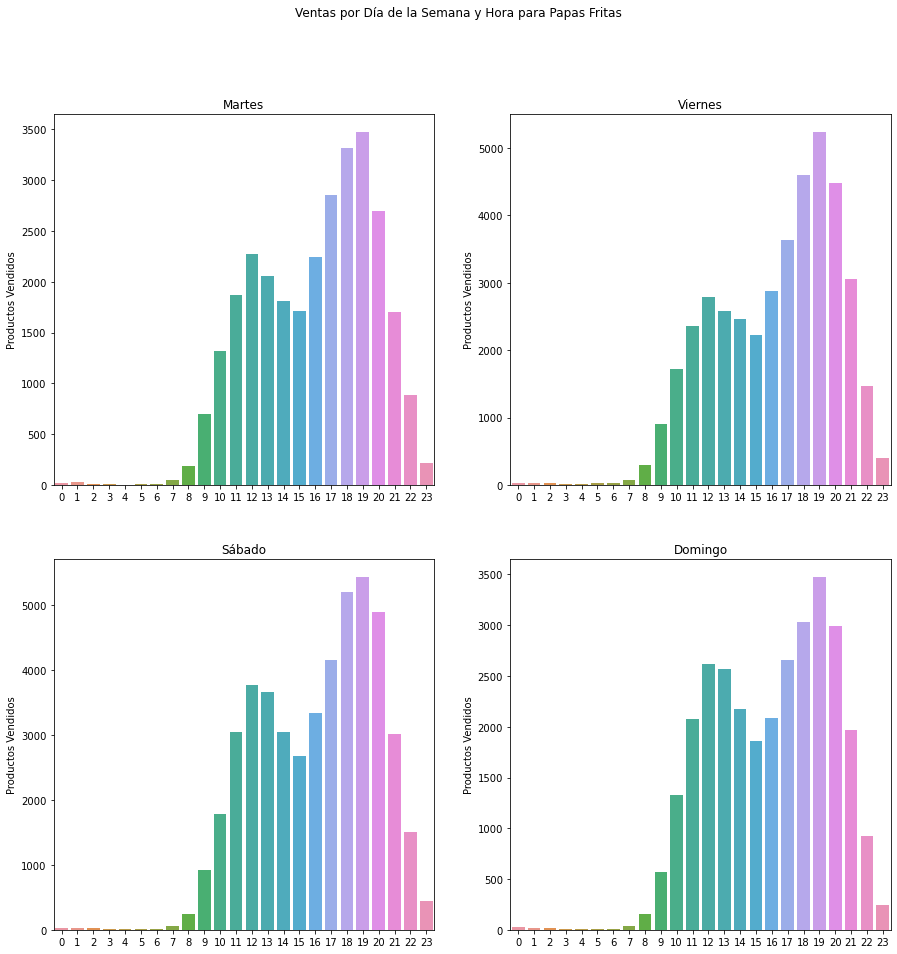

In [11]:
plot_category_by_day('Papas Fritas', ["Martes", "Viernes", "Sábado", "Domingo"])

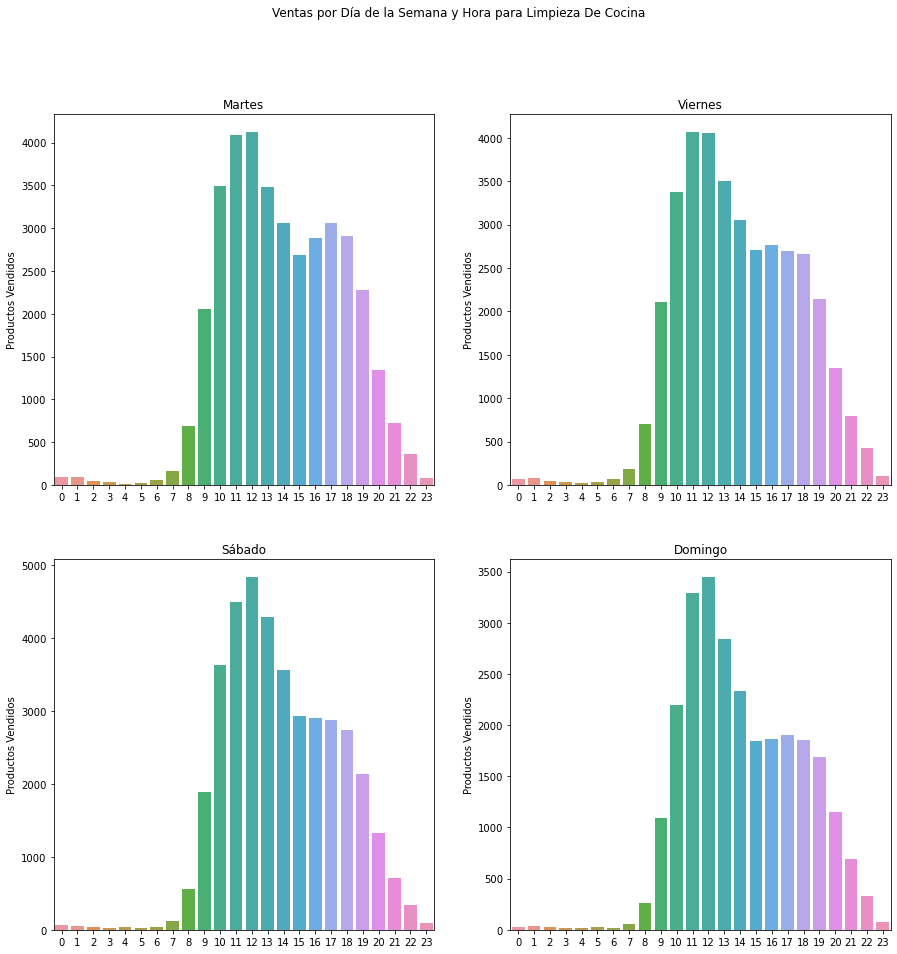

In [12]:
plot_category_by_day('Limpieza De Cocina', ["Martes", "Viernes", "Sábado", "Domingo"])